<a href="https://colab.research.google.com/github/Herzanet002/ML2023/blob/main/Poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Полиномиальная регрессия

Формируем обучающую выборку.

X - случайная величина из равномерного распределения [-1;2]

E - случайная величина (аддитивный шум) из нормального распределения (0;1.5)

Y - зависимая случйаная величина.

In [274]:
import numpy as np


def f(x):
  return x ** 9 - 4 * x ** 5 + 3 * x - 2

N = 100
X = np.random.uniform(-1, 2, N)
E = np.random.normal(0, 1.5, N)
Y = np.vectorize(f)(X) + E

Рисуем график исходной функции и выборки. 

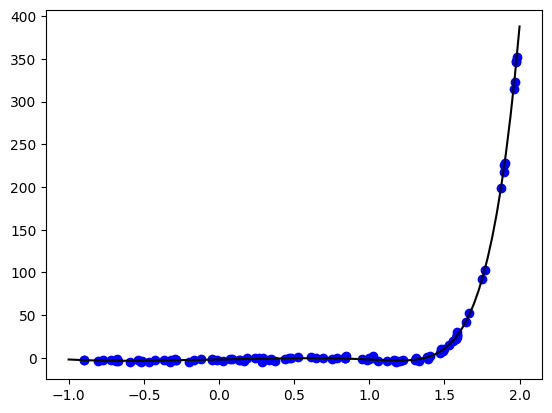

In [275]:
M = 100
xs = np.linspace(-1, 2, M)
ys = np.vectorize(f)(xs)

import matplotlib.pyplot as plt
plt.plot(X, Y, 'bo', xs, ys, 'k')
plt.show()

Формируем модель - полиномиальная функция степени ORDER.

w - параметры модели, требующие обучения.

In [276]:
import torch

ORDER = 10
w = torch.rand((1, ORDER+1), requires_grad = True, dtype=torch.float64)

def model(x):
  phi = torch.stack([x ** i for i in range(0, ORDER + 1)])
  return torch.matmul(w, phi)

Реализуем функцю квадратичную функцию потерь.

In [277]:
def loss(y_predicted, y_actual):
  LAMBDA = 0.01 # коэффициент регуляризации
  return torch.mean(torch.pow(y_predicted - y_actual, 2)) + LAMBDA * (torch.sum(torch.pow(w, 2))) 

Обучаем наши параметры. 

EPOCH - количество итераций обучения.

ALPHA - скорость обучения.

In [278]:
EPOCH = 300
ALPHA = 0.0001
optimizer = torch.optim.Adam([w], lr=ALPHA)

for e in range(EPOCH):
    for i in range(N):
      x, y = torch.tensor(X[i]), torch.tensor(Y[i])
      y_predict = model(x)
      loss_tensor = loss(y_predict, y)
      optimizer.zero_grad()
      loss_tensor.backward()
      optimizer.step()
    if e % 10 == 0:
      print(e, loss_tensor.detach().numpy())

0 6.671103673535258
10 5.722947507802043
20 4.8672889301846505
30 4.093844002703633
40 3.395470166249277
50 2.767910717905423
60 2.2087110594611192
70 1.7163707394771803
80 1.2897983264249697
90 0.9279824773038633
100 0.6297744585731351
110 0.3936948950928037
120 0.21768565067647722
130 0.09870716629679271
140 0.03202972116182547
150 0.010103107881650098
160 0.021934993435844596
170 0.05805025253200459
180 0.12197874865165545
190 0.22530211371134753
200 0.37324907211372366
210 0.5653478983359488
220 0.7997011512060418
230 1.0744957073682881
240 1.3881627468568094
250 1.7392426865075423
260 2.12625703362859
270 2.54762538627956
280 3.0016122089422024
290 3.4862875748804503


Выведим значения параметров модели.

In [279]:
w

tensor([[-0.4808, -0.7710, -0.1391, -0.3783, -0.0347, -0.2131, -0.3813,  0.4765,
         -0.2748,  0.4420,  0.1933]], dtype=torch.float64, requires_grad=True)

Нарисуем графики:


1.   Черный - истинная функция.
2.   Синий - исходная выборка.
3.   Красный - обученная модель.



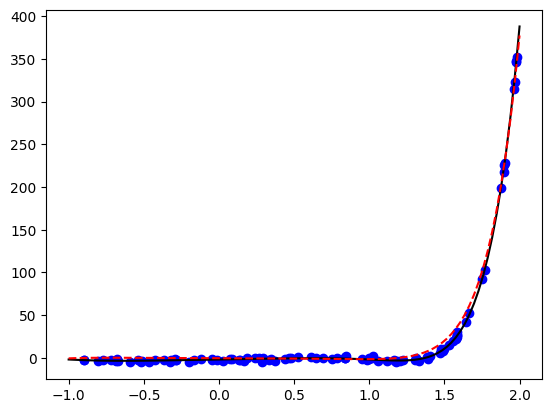

In [280]:
xs_tensor = torch.tensor(xs)
with torch.no_grad():
  y_pred = model(xs_tensor).detach().numpy()[0]

plt.plot(X, Y, 'bo', xs, ys, 'k', xs, y_pred, 'r--')
plt.show()